[*********************100%***********************]  1 of 1 completed


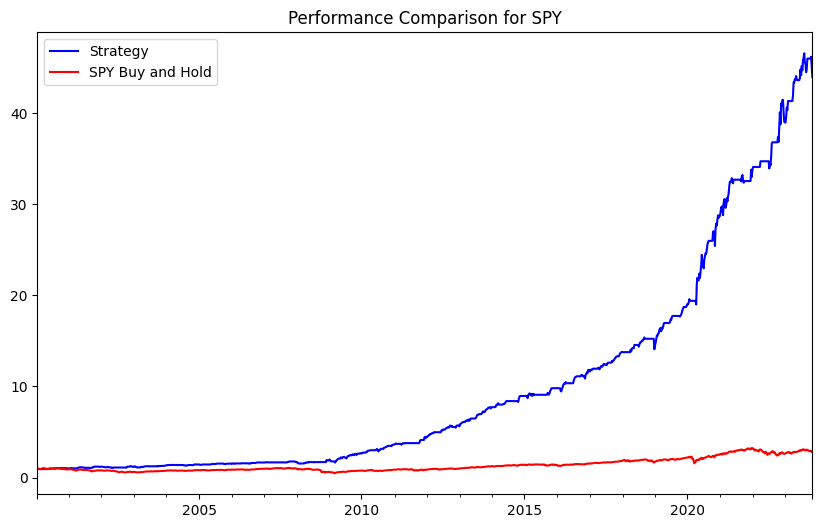

For SPY:
Strategy: CAGR: 17.23%, Max Drawdown: -16.94%, Sharpe Ratio: 1.41
SPY Buy and Hold: CAGR: 4.62%, Max Drawdown: -55.91%, Sharpe Ratio: 0.34
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


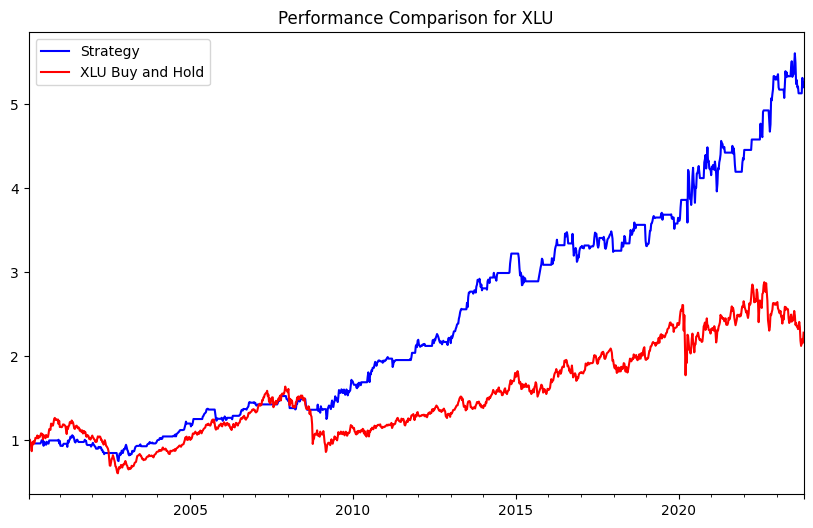

For XLU:
Strategy: CAGR: 7.23%, Max Drawdown: -29.04%, Sharpe Ratio: 0.63
XLU Buy and Hold: CAGR: 3.52%, Max Drawdown: -52.12%, Sharpe Ratio: 0.28
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


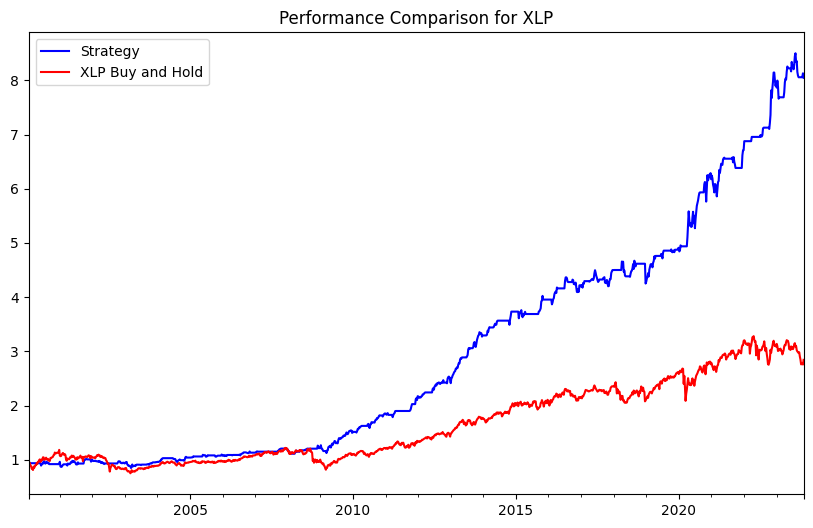

For XLP:
Strategy: CAGR: 9.16%, Max Drawdown: -16.29%, Sharpe Ratio: 1.00
XLP Buy and Hold: CAGR: 4.49%, Max Drawdown: -36.56%, Sharpe Ratio: 0.38
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


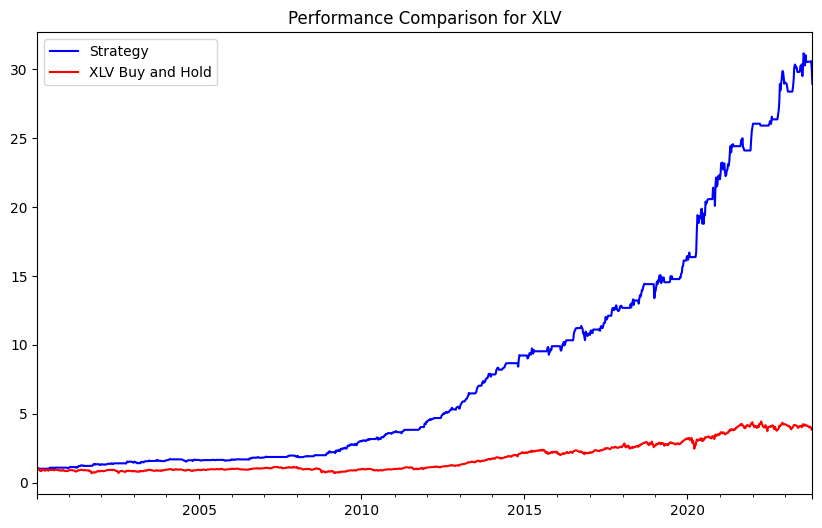

For XLV:
Strategy: CAGR: 15.19%, Max Drawdown: -10.94%, Sharpe Ratio: 1.34
XLV Buy and Hold: CAGR: 5.94%, Max Drawdown: -39.38%, Sharpe Ratio: 0.42
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


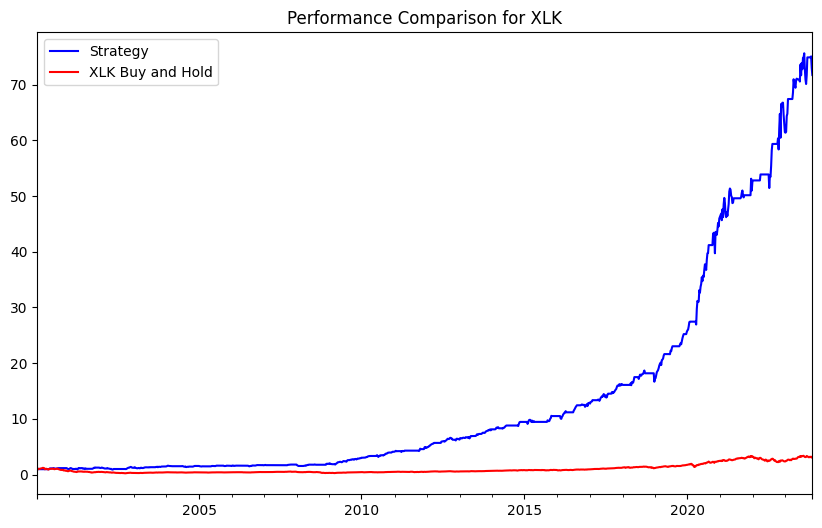

For XLK:
Strategy: CAGR: 19.66%, Max Drawdown: -29.46%, Sharpe Ratio: 1.18
XLK Buy and Hold: CAGR: 5.03%, Max Drawdown: -81.40%, Sharpe Ratio: 0.33
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


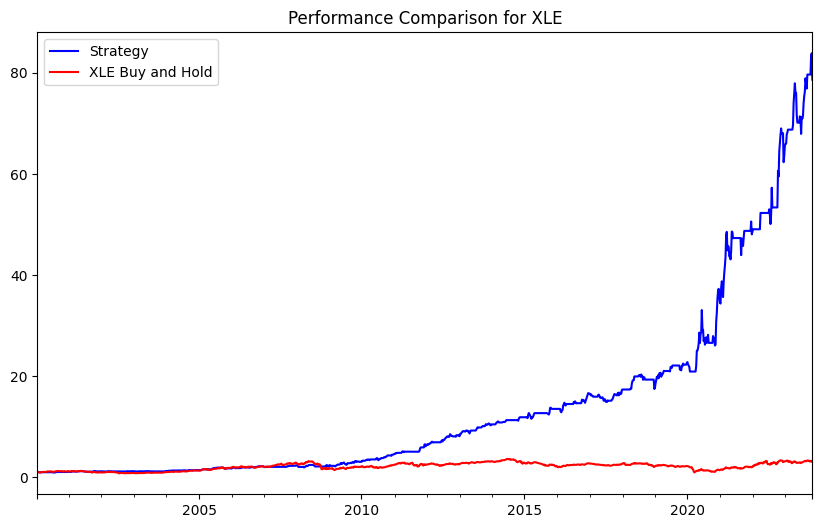

For XLE:
Strategy: CAGR: 20.13%, Max Drawdown: -21.27%, Sharpe Ratio: 1.09
XLE Buy and Hold: CAGR: 4.90%, Max Drawdown: -74.38%, Sharpe Ratio: 0.31
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


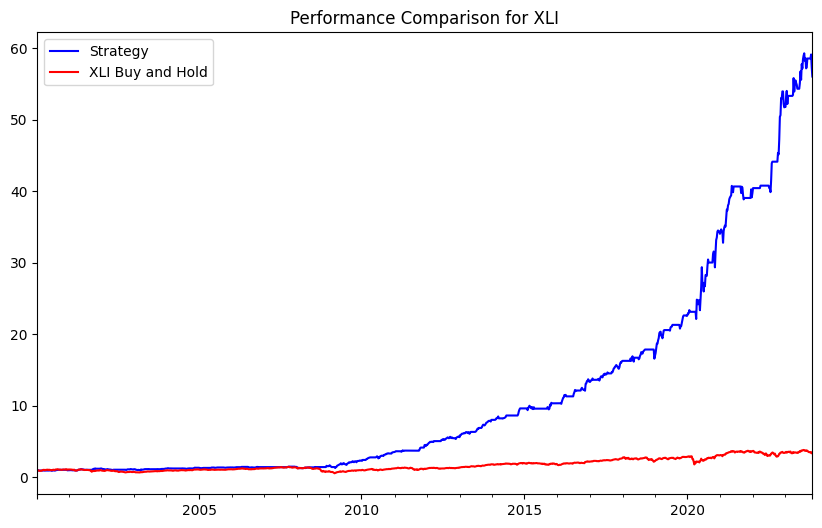

For XLI:
Strategy: CAGR: 18.43%, Max Drawdown: -23.06%, Sharpe Ratio: 1.24
XLI Buy and Hold: CAGR: 5.37%, Max Drawdown: -62.72%, Sharpe Ratio: 0.35
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


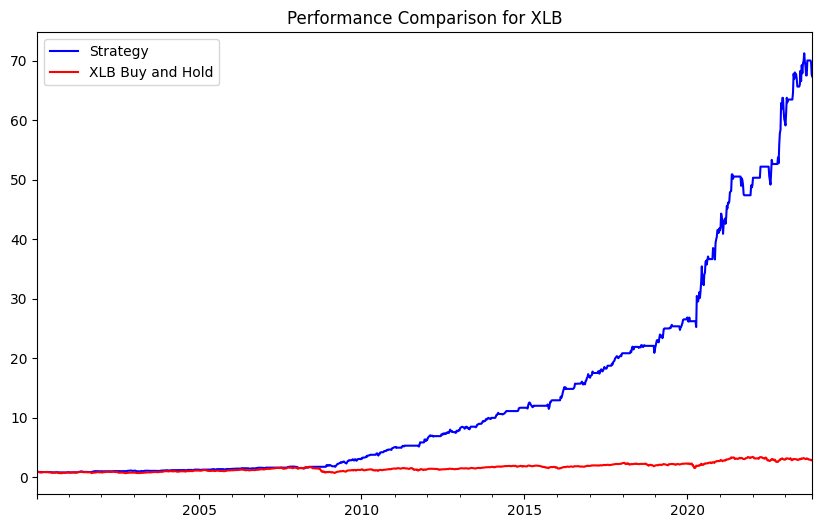

For XLB:
Strategy: CAGR: 19.35%, Max Drawdown: -20.83%, Sharpe Ratio: 1.21
XLB Buy and Hold: CAGR: 4.61%, Max Drawdown: -59.92%, Sharpe Ratio: 0.31
--------------------------------------------------


In [21]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Read the NFCI data
nfci_data = pd.read_csv('nfci.csv')
nfci_data['date'] = pd.to_datetime(nfci_data['DATE'])
nfci_data.set_index('date', inplace=True)
nfci_data['nfci_sma_14'] = nfci_data['NFCI'].rolling(window=2).mean()  # Corrected window size

tickers = ['SPY', 'XLU', 'XLP', 'XLV', 'XLK', 'XLE', 'XLI', 'XLB']  # Added BTC-USD for Bitcoin

for ticker in tickers:
    # Download data for the ticker
    stock_data = yf.download(ticker, start='2000-01-01', end=nfci_data.index.max())
    stock_data = stock_data[['Close']].resample("W-FRI").last()

    # Merge the two dataframes
    data = stock_data.join(nfci_data, how='inner')

    # Create a signal
    data['signal'] = np.where(data['NFCI'] < data['nfci_sma_14'], 1, 0)

    # Calculate strategy returns
    data['strategy_returns'] = data['Close'].shift(1).pct_change() * data['signal']
    data['stock_returns'] = data['Close'].pct_change()

    # Drop missing values
    data.dropna(inplace=True)

    # Plot the strategy and stock performance
    plt.figure(figsize=(10, 6))
    (data['strategy_returns'] + 1).cumprod().plot(label='Strategy', color='b')
    (data['stock_returns'] + 1).cumprod().plot(label=f'{ticker} Buy and Hold', color='r')
    plt.title(f'Performance Comparison for {ticker}')
    plt.legend()
    plt.show()

    # Annualizing factor assuming trading days
    annualizing_factor = 52

    # CAGR
    years = (data.index[-1] - data.index[0]).days / 365.0
    cagr_strategy = (1 + data['strategy_returns']).cumprod().iloc[-1] ** (1 / years) - 1
    cagr_stock = (1 + data['stock_returns']).cumprod().iloc[-1] ** (1 / years) - 1

    # Max Drawdown
    cumulative_returns_strategy = (1 + data['strategy_returns']).cumprod()
    rolling_max_strategy = cumulative_returns_strategy.expanding().max()
    daily_drawdown_strategy = cumulative_returns_strategy / rolling_max_strategy - 1
    max_drawdown_strategy = daily_drawdown_strategy.min()

    cumulative_returns_stock = (1 + data['stock_returns']).cumprod()
    rolling_max_stock = cumulative_returns_stock.expanding().max()
    daily_drawdown_stock = cumulative_returns_stock / rolling_max_stock - 1
    max_drawdown_stock = daily_drawdown_stock.min()

    # Sharpe Ratio (assuming risk-free rate to be 0)
    sharpe_ratio_strategy = np.mean(data['strategy_returns']) / np.std(data['strategy_returns']) * np.sqrt(annualizing_factor)
    sharpe_ratio_stock = np.mean(data['stock_returns']) / np.std(data['stock_returns']) * np.sqrt(annualizing_factor)

    # Printing the results
    print(f"For {ticker}:")
    print(f"Strategy: CAGR: {cagr_strategy:.2%}, Max Drawdown: {max_drawdown_strategy:.2%}, Sharpe Ratio: {sharpe_ratio_strategy:.2f}")
    print(f"{ticker} Buy and Hold: CAGR: {cagr_stock:.2%}, Max Drawdown: {max_drawdown_stock:.2%}, Sharpe Ratio: {sharpe_ratio_stock:.2f}")
    print("-" * 50)


[*********************100%***********************]  1 of 1 completed


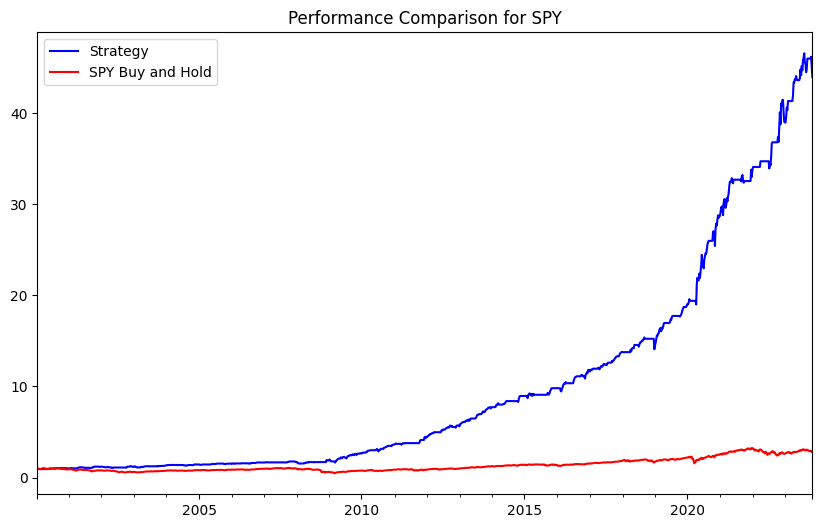

For SPY:
Strategy: CAGR: 17.23%, Max Drawdown: -16.94%, Sharpe Ratio: 1.41
SPY Buy and Hold: CAGR: 4.62%, Max Drawdown: -55.91%, Sharpe Ratio: 0.34
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


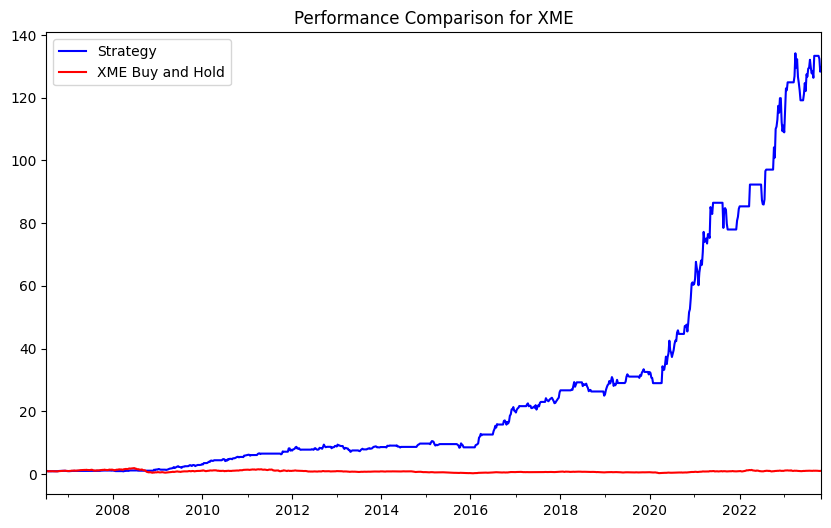

For XME:
Strategy: CAGR: 32.39%, Max Drawdown: -24.64%, Sharpe Ratio: 1.20
XME Buy and Hold: CAGR: 0.14%, Max Drawdown: -87.00%, Sharpe Ratio: 0.19
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


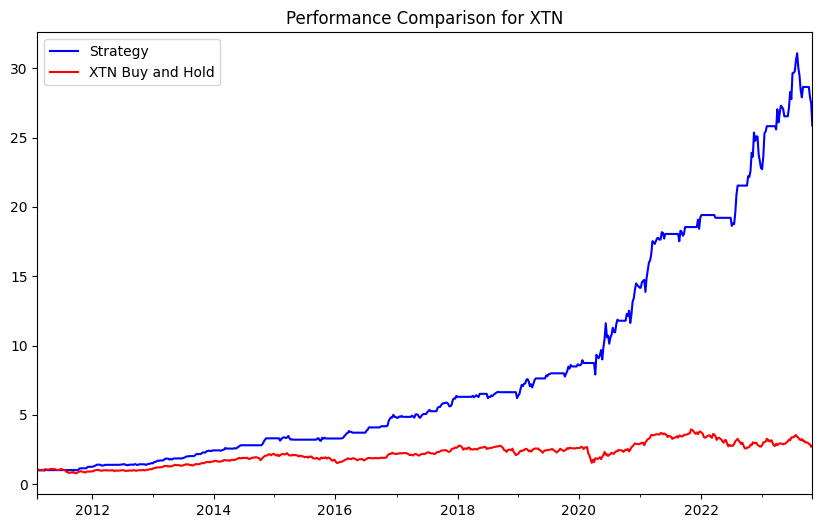

For XTN:
Strategy: CAGR: 29.10%, Max Drawdown: -16.82%, Sharpe Ratio: 1.65
XTN Buy and Hold: CAGR: 8.40%, Max Drawdown: -44.56%, Sharpe Ratio: 0.45
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


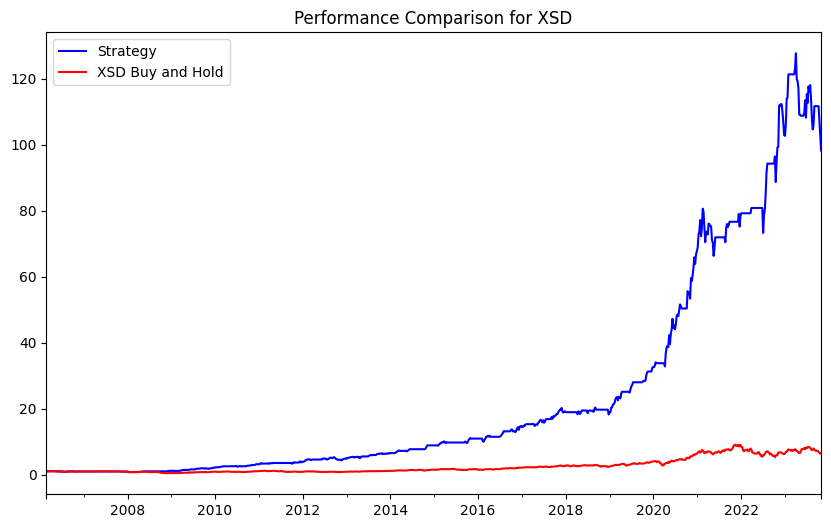

For XSD:
Strategy: CAGR: 29.58%, Max Drawdown: -23.90%, Sharpe Ratio: 1.38
XSD Buy and Hold: CAGR: 11.15%, Max Drawdown: -63.10%, Sharpe Ratio: 0.51
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


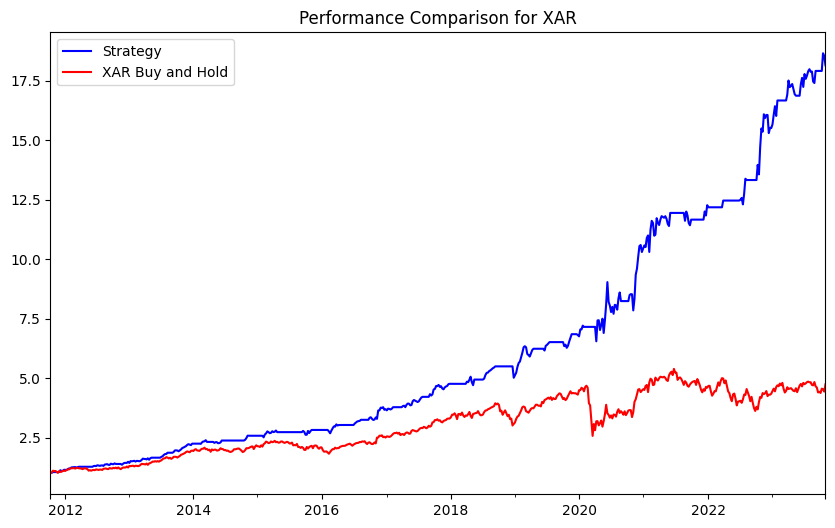

For XAR:
Strategy: CAGR: 27.16%, Max Drawdown: -14.72%, Sharpe Ratio: 1.60
XAR Buy and Hold: CAGR: 13.77%, Max Drawdown: -45.06%, Sharpe Ratio: 0.68
--------------------------------------------------


In [24]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Read the NFCI data
nfci_data = pd.read_csv('nfci.csv')
nfci_data['date'] = pd.to_datetime(nfci_data['DATE'])
nfci_data.set_index('date', inplace=True)
nfci_data['nfci_sma_14'] = nfci_data['NFCI'].rolling(window=2).mean()  # Corrected window size

tickers = ['SPY', 'XME', 'XTN', 'XSD', 'XAR']  # Added BTC-USD for Bitcoin

for ticker in tickers:
    # Download data for the ticker
    stock_data = yf.download(ticker, start='2000-01-01', end=nfci_data.index.max())
    stock_data = stock_data[['Close']].resample("W-FRI").last()

    # Merge the two dataframes
    data = stock_data.join(nfci_data, how='inner')

    # Create a signal
    data['signal'] = np.where(data['NFCI'] < data['nfci_sma_14'], 1, 0)

    # Calculate strategy returns
    data['strategy_returns'] = data['Close'].shift(1).pct_change() * data['signal']
    data['stock_returns'] = data['Close'].pct_change()

    # Drop missing values
    data.dropna(inplace=True)

    # Plot the strategy and stock performance
    plt.figure(figsize=(10, 6))
    (data['strategy_returns'] + 1).cumprod().plot(label='Strategy', color='b')
    (data['stock_returns'] + 1).cumprod().plot(label=f'{ticker} Buy and Hold', color='r')
    plt.title(f'Performance Comparison for {ticker}')
    plt.legend()
    plt.show()

    # Annualizing factor assuming trading days
    annualizing_factor = 52

    # CAGR
    years = (data.index[-1] - data.index[0]).days / 365.0
    cagr_strategy = (1 + data['strategy_returns']).cumprod().iloc[-1] ** (1 / years) - 1
    cagr_stock = (1 + data['stock_returns']).cumprod().iloc[-1] ** (1 / years) - 1

    # Max Drawdown
    cumulative_returns_strategy = (1 + data['strategy_returns']).cumprod()
    rolling_max_strategy = cumulative_returns_strategy.expanding().max()
    daily_drawdown_strategy = cumulative_returns_strategy / rolling_max_strategy - 1
    max_drawdown_strategy = daily_drawdown_strategy.min()

    cumulative_returns_stock = (1 + data['stock_returns']).cumprod()
    rolling_max_stock = cumulative_returns_stock.expanding().max()
    daily_drawdown_stock = cumulative_returns_stock / rolling_max_stock - 1
    max_drawdown_stock = daily_drawdown_stock.min()

    # Sharpe Ratio (assuming risk-free rate to be 0)
    sharpe_ratio_strategy = np.mean(data['strategy_returns']) / np.std(data['strategy_returns']) * np.sqrt(annualizing_factor)
    sharpe_ratio_stock = np.mean(data['stock_returns']) / np.std(data['stock_returns']) * np.sqrt(annualizing_factor)

    # Printing the results
    print(f"For {ticker}:")
    print(f"Strategy: CAGR: {cagr_strategy:.2%}, Max Drawdown: {max_drawdown_strategy:.2%}, Sharpe Ratio: {sharpe_ratio_strategy:.2f}")
    print(f"{ticker} Buy and Hold: CAGR: {cagr_stock:.2%}, Max Drawdown: {max_drawdown_stock:.2%}, Sharpe Ratio: {sharpe_ratio_stock:.2f}")
    print("-" * 50)
